# Pair Programming Ajuste

Es el momento de realizar el ajuste de vuestro modelo, en este caso tendréis que usar el csv que guardastéis ayer después de todo el preprocesamiento. Los objetivos de esta lección son:

* Realizar el ajuste o ajustes de los modelos.

* Sacad la matriz de confusión de vuestro modelo e identificad cuáles son los verdaderos positivos, verdaderos negativos, falsos positivos y falsos negativos.

In [1]:

# Tratamiento de datos
# -----------------------------------------------------------------------
import numpy as np
import pandas as pd

# Gráficos
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns


#  Modelado y matriz de confusión
# ------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix


#  Gestión de warnings
# ------------------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")

A. Realización del modelo con variables estandarizadas y balanceadas:

In [4]:
df_est_balan = pd.read_csv("datos/diabetes_est_balanc.csv", index_col=0)
df_est_balan.head(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Age,Outcome
0,-0.545371,0.274299,2.136852,-1.302720,-0.784632,-1.498343,-1.064466,0
1,2.208174,-0.350322,1.059601,1.246946,-0.784632,2.279140,1.107837,1


In [5]:
# separamos los datos:
X1 = df_est_balan.drop("Outcome", axis = 1)
y1 = df_est_balan["Outcome"]

In [7]:
X1.head() # Comprobamos que X contiene todas nuestras variables predictoras:

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Age
0,-0.545371,0.274299,2.136852,-1.302720,-0.784632,-1.498343,-1.064466
1,2.208174,-0.350322,1.059601,1.246946,-0.784632,2.279140,1.107837
2,-0.545371,-0.547570,0.700517,1.565654,1.676763,0.234304,-0.340365
3,-0.545371,-1.270815,-0.556276,0.163338,-0.140287,0.000163,-0.973953
4,1.290326,-1.237941,0.161892,0.673271,-0.784632,0.952338,0.564761


In [8]:
y1.head() # el y contiene nuestra variable respuesta:

0    0
1    1
2    1
3    0
4    0
Name: Outcome, dtype: int64

In [9]:
# Hacemos el Train-Test split
x_train1, x_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size = 0.2, random_state = 42)

## Ajuste y predicción del modelo:

In [10]:

# definimos la regresión logistica

log_reg_esta = LogisticRegression(n_jobs=-1, max_iter = 1000)

# ajustamos el modelo
log_reg_esta.fit(x_train1,y_train1)

# obtenemos las predicciones para el conjunto de entrenamiento
y_pred_train_esta = log_reg_esta.predict(x_train1)

# obtenemos las predicciones para el conjunto de test
y_pred_test_esta = log_reg_esta.predict(x_test1)

In [11]:
train_df_esta = pd.DataFrame({'Real': y_train1, 'Predicted': y_pred_train_esta, 'Set': ['Train']*len(y_train1)})
test_df_esta  = pd.DataFrame({'Real': y_test1,  'Predicted': y_pred_test_esta,  'Set': ['Test']*len(y_test1)})
resultados = pd.concat([train_df_esta,test_df_esta], axis = 0)
resultados.head()

,Real,Predicted,Set
487,0,0,Train
421,0,0,Train
104,0,0,Train
114,0,0,Train
349,1,0,Train


Matriz de confusión:

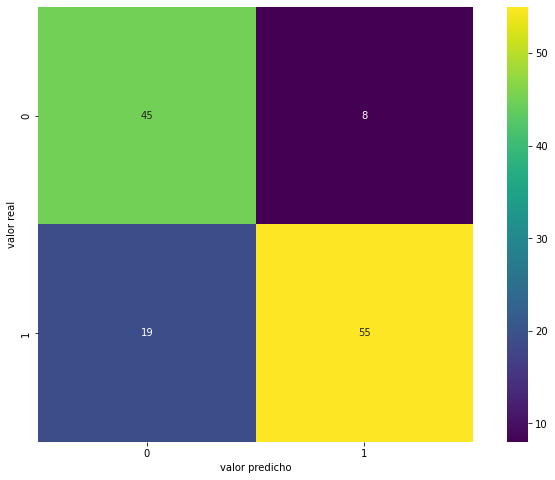

In [12]:
mat_lr1 = confusion_matrix(y_test1, y_pred_test_esta)

plt.figure(figsize = (12, 8))
sns.heatmap(mat_lr1, square=True, annot=True, fmt="d", cmap = "viridis")

plt.xlabel('valor predicho')
plt.ylabel('valor real')
plt.show()

Interpretación Matriz de Confusión:
Recordemos que en nuestro dataframe la variable respuesta "Outcome" se divide en: 1 = Sí, 0 = No.

* Nuestro modelo ha predicho que 45 es el número de mujeres sin diabetes, con diagnostico negativo (Verdadero Positivo).

* En nuestro caso el valor 55, refiere a mujeres con diabetes que han tenido un diagnóstico positivo (Verdadero Negativo).

* El modelo ha predicho que 19 personas no tienen diabetes cuando en realidad sí lo tienen (Falso Positivo).

* El modelo ha predicho que 8 mujeres sí tienen diabetes cuando en realidad no lo tienen (Falso Negativo).



B. Realización del modelo con variables estandarizadas sin balancear:

In [40]:
df_estand = pd.read_csv("datos/diabetes_estand.csv", index_col=0)
df_estand.head(2)

,Outcome,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Age,Pregnancies.1,Glucose.1,BloodPressure.1,SkinThickness.1,Insulin.1,BMI.1,Age.1
0,1,0.678427,0.866045,-0.017650,0.928238,-0.784632,0.218695,1.56040,0.678427,0.866045,-0.017650,0.928238,-0.784632,0.218695,1.56040
1,0,-0.851320,-1.205066,-0.556276,0.545788,-0.784632,-0.873966,-0.15934,-0.851320,-1.205066,-0.556276,0.545788,-0.784632,-0.873966,-0.15934


In [41]:
X2 = df_estand.drop("Outcome", axis = 1)
y2 = df_estand["Outcome"]

In [42]:
X2.head(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Age,Pregnancies.1,Glucose.1,BloodPressure.1,SkinThickness.1,Insulin.1,BMI.1,Age.1
0,0.678427,0.866045,-0.017650,0.928238,-0.784632,0.218695,1.56040,0.678427,0.866045,-0.017650,0.928238,-0.784632,0.218695,1.56040
1,-0.851320,-1.205066,-0.556276,0.545788,-0.784632,-0.873966,-0.15934,-0.851320,-1.205066,-0.556276,0.545788,-0.784632,-0.873966,-0.15934


In [43]:
y2.head(2)

0    1
1    0
Name: Outcome, dtype: int64

Train test split

In [44]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size = 0.2, random_state = 42)

Ajuste y predicción del modelo:

In [45]:
# definimos la regresión logistica

log_reg = LogisticRegression(n_jobs=-1, max_iter = 1000)

# ajustamos el modelo
log_reg.fit(x_train2,y_train2)

# obtenemos las predicciones para el conjunto de entrenamiento
y_pred_train = log_reg.predict(x_train2)

# obtenemos las predicciones para el conjunto de test
y_pred_test = log_reg.predict(x_test2)

In [46]:
train_df = pd.DataFrame({'Real': y_train2, 'Predicted': y_pred_train, 'Set': ['Train']*len(y_train2)})
test_df  = pd.DataFrame({'Real': y_test2,  'Predicted': y_pred_test,  'Set': ['Test']*len(y_test2)})
resultados2 = pd.concat([train_df,test_df], axis = 0)
resultados2.head()

,Real,Predicted,Set
60,0,0,Train
618,1,0,Train
346,0,0,Train
294,0,1,Train
231,1,1,Train


Matriz de confusión para datos estandarizados no balanceados:

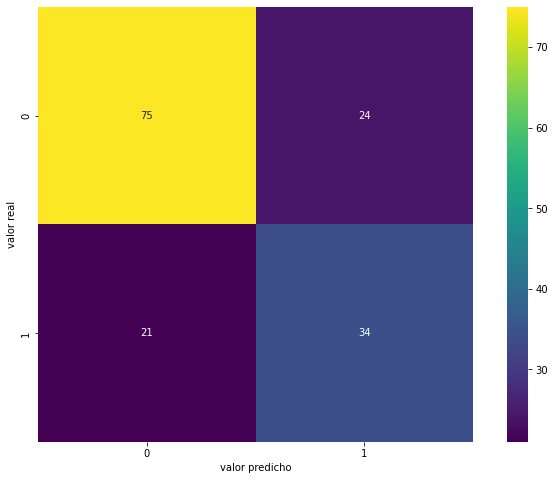

In [47]:

mat_lr2 = confusion_matrix(y_test2, y_pred_test)

plt.figure(figsize = (12, 8))
sns.heatmap(mat_lr2, square=True, annot=True, fmt="d", cmap = "viridis")

plt.xlabel('valor predicho')
plt.ylabel('valor real')
plt.show()

Interpretación de la matriz de confusión:

Según esta matriz de confusión, podemos ver como el modelo predice peor cuando utilizamos los datos sin balancear, dado que los falsos negativos (FN) y los falsos positivo (FP) son más elevados que en el modelo anterior.

* El nº75 corresponde en nuestro caso a mujeres sin diabetes cuyo diagnóstico ha sido que no la tienen (Verdadero Positivo).

* El valor 34 indica que el modelo ha predicho que sí la tienen y en realidad tienen diabetes (Verdadero Negativo).

* En el caso del valor 21, nuestro modelo ha predicho que no tienen diabetes cuando en realidad sí la tienen (Falso Positivo).

* El 24 indica que el modelo ha predicho que sí tienen diabetes cuando en realidad no la tienen (Falso Negativo).